# S1 and S2 identification and analysis # 
Author: Marjolein Heidotting

In [16]:
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


254 :  -54332.0 28 100055 |  0.960407805854
254 :  -578029.0 466 122173 |  0.877574012643


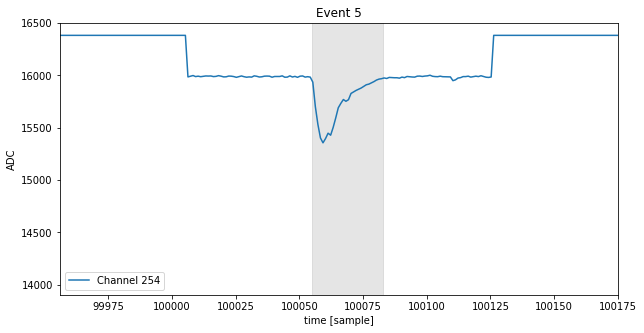

In [17]:
%run New_Peakfinder.ipynb

In [20]:
print(Waveform(6)[2])

[0, 3, 4, 5, 6, 7, 8, 9, 11, 22, 25, 28, 29, 30, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 54, 56, 57, 59, 60, 63, 64, 66, 67, 68, 69, 70, 71, 74, 75, 77, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 149, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 204, 205, 207, 208, 209, 210, 211, 212, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 237, 238, 240, 241, 242, 243, 245, 246, 247]


In [13]:
def width_finder(eventnum, boundary):
    """
    Finding the widths of the peaks in a certain event
    
    @param eventnum: The number of the event
    
    @type widthlist: list
    @param widthlist: contains the widths of the peaks in the given event
    """
    
    #setting
    event = 0
    returnlist = []
    widthlist = []
    
    #Loop over all pulses in the event
    for event in range(eventnum):
        returnlist.append([event, [],[]])
        event = NG.get_single_event(event)
        
        for p in event.pulses:
            result = Peaks(p)
            
            
            if result[2] != 0:
                widthlist.append(result[2])
                if result[2]<boundary:#and len(returnlist[-1][1]) == 0:
                    returnlist[-1][1].append(result[2])
                else:
                    returnlist[-1][2].append(result[2])
                
                

    return returnlist, widthlist

#Try out for event 12

#print("The widths of the peaks",lists[1])
#print(lists[2])



In [15]:
#all widths for 1000 events with the boundary between s1 and s2 at 125
masterlist = width_finder(50,125) 

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
def resort(boundary):
    """
    Resorts s1 and s2 peaks according to the boundary
    Does not currently behave the way i would like it to
    """
    eventlist = masterlist[0]
    
    for event in eventlist:
        for s1 in event[1]:
            #print(s1)
            if s1>boundary:
                event[2].append(s1)
                event[1].remove(s1)
    
        for s2 in event[2]:
            if s2<boundary:
                event[2].remove(s2)
                event[1].append(s1)
    
    return eventlist

eventlist = resort(200)


Text(0,0.5,'Entries')

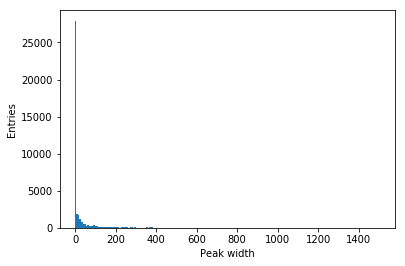

In [5]:
#Making a histogram of the widths of the peaks of the first 100 events

hist = masterlist[1]
n, bins, patches = plt.hist(hist, 200, range=(-0.5,1500.5))
plt.xlabel('Peak width')
plt.ylabel('Entries')

Based on the previous histogram, we'll set the difference in widths of the S1 and S2 peak to 150

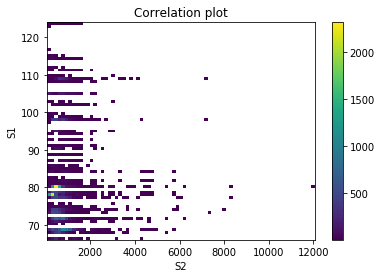

In [16]:
#setting the number of events to loop over
eventnum = 50

#list of list of an event, s1list and s2list
event = masterlist[0]


s1list = []
s2list = []

#looping over all events and putting them in collective lists
i=0
while i<eventnum:
    for s1 in event[i][1]:
        for s2 in event[i][2]:
            s1list.append(s1)
            s2list.append(s2)
    i+=1
    
#print(s1list)
colors = (0,0,0)
area = np.pi*3

s1 = np.array(s1list)
s2 = np.array(s2list)

# Plot
plt.hist2d(s2,s1, 75, cmin=2) #making the plot, leaving out empty bin
plt.title('Correlation plot')
plt.xlabel('S2')
plt.ylabel('S1')
plt.colorbar()
plt.show()
